# NAG Optimizer low level로 구현하기

###  Rosenbrock의 최적해를 찾아가는 optimizer를 구현 및 실험한다.
- tensorflow 의 high api와 결과를 비교한다.


​
${\displaystyle f(x,y)=(1-x)^{2}+100(y-x^{2})^{2}}$
​

![Imgur](https://i.imgur.com/qMRFEAZ.png) 

In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

### tf.gradient 메소드가 변수간의 의존성을 검사하여 미분불가능시 error가 발생함을 유의한다.




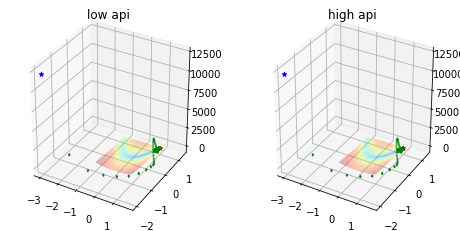

In [0]:
beta = 0.9
lr = 0.00005

xy = tf.Variable(initial_value=start_xy, dtype=tf.float32, name='xy')

v = tf.Variable(tf.constant(value = [0.,0.]))

grad_xy = tf.gradients(rosenbrock(xy[0],xy[1]), xy)[0]

##NAG optimizer 수식###########################################
v_assign = tf.assign(v, (beta * v) - (lr*grad_xy))            #
step = tf.assign_add(xy,  (v_assign * beta) - (grad_xy * lr)) #
###############################################################

step_api = tf.train.MomentumOptimizer(lr, beta, use_nesterov=True).minimize(rosenbrock(xy[0],xy[1]))

# 시각화 코드 
steps = [step, step_api] 
titles = ['low api', 'high api'] 
fig = plt.figure(figsize=plt.figaspect(0.5))
for ind in range(2):
    ax = fig.add_subplot(1,2,ind+1,projection='3d')
    # plot start point 
    ax.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=0.3, norm=LogNorm())
    ax.scatter(xs=min_x, ys=min_y, marker='*', color='r')
    ax.scatter(xs=start_x, ys=start_y, zs=rosenbrock(-3, -2), marker='*', color='b')

    # Session
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    xy_history = []
    v_history = []
    for i in range(15000):
        _, xy_, v_ = sess.run([steps[ind], xy, v])
        xy_history.append(xy_)
        v_history.append(v_)
    xy_history = np.stack(xy_history, axis=0)
    ax.scatter(xs=xy_history[:, 0], ys=xy_history[:, 1], zs=rosenbrock(xy_history[:, 0], xy_history[:, 1]),
               marker='d', color='g', s=3)
    ax.set_title(titles[ind])
plt.show()